<b>
<p>
<center>
<font size="5">
Stock Market Prediction
</font>
</center>
</p>
</b>

# Introduction

## Problem and motivation:
The aim of this project is to predict if a particular stock price on a particular day and month would increase or decrease.There are many sources on the internet and in the news to gain
information relating to stocks, but how much of this information is actually reliable? Can one
really depend on this information to buy/sell stocks? Given the volatility of the market, we
think that just depending on the news to buy/sell stocks is no good. With our team members
interest in the Stock market and real-time experience in trading, we wanted to create a model
with the use of historical stock market data. We aim to get a decent prediction rate with our
model so that we can actually rely on it to buy/sell stocks, this was the motivation which led
us to work with this data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fundamentals=pd.read_csv('fundamentals.csv')
split_adj_price=pd.read_csv('prices-split-adjusted.csv')
sec=pd.read_csv('securities.csv')

In [3]:
sec = sec.rename(columns = {'Ticker symbol' : 'symbol','GICS Sector' : 'sector','GICS Sub Industry':'sub_sector'})
fundamentals = fundamentals.rename(columns = {'Ticker Symbol' : 'symbol'})
adj_price  = split_adj_price.merge(sec[['symbol','sector','sub_sector','Security']], on = 'symbol')
adj_price['date'] = pd.to_datetime(adj_price['date'])
adj_price.insert(4, 'per_chg',((adj_price.close)-(adj_price.open))/adj_price.open*100) ## calculates percentage change between open and close prices of a stock
adj_price.insert(1, 'year',pd.DatetimeIndex(adj_price['date']).year.astype(np.int64)) ## extracts year from date
adj_price.insert(2, 'month',pd.DatetimeIndex(adj_price['date']).month.astype(np.int64)) ## extracts month from date 
adj_price.insert(3, 'day',pd.DatetimeIndex(adj_price['date']).day.astype(np.int64)) ## extracts day from date 
adj_price.insert(7,'change',(np.where(adj_price['per_chg']>0, 'positive','negative')))  ## creating theh target variable


In [4]:
fundamentals.drop(columns='Unnamed: 0',axis=1,inplace=True)
#adj_price.drop(columns='date',axis=1,inplace=True)
fundamentals.insert(1, 'prd_end_year',pd.DatetimeIndex(fundamentals['Period Ending']).year.astype(np.int64)) ## extracts year from date
fundamentals.insert(2, 'prd_end_month',pd.DatetimeIndex(fundamentals['Period Ending']).month.astype(np.int64)) ## extracts month from date 
fundamentals.insert(3, 'prd_end_day',pd.DatetimeIndex(fundamentals['Period Ending']).day.astype(np.int64)) ## extracts day from date 
fundamentals.drop(columns='Period Ending',axis=1,inplace=True)
adj_price=adj_price.round(2)
adj_price.head()



,date,year,month,day,symbol,open,close,change,per_chg,low,high,volume,sector,sub_sector,Security
0,2016-01-05,2016,1,5,WLTW,123.43,125.84,positive,1.95,122.31,126.25,2163600.0,Financials,Insurance Brokers,Willis Towers Watson
1,2016-01-06,2016,1,6,WLTW,125.24,119.98,negative,-4.20,119.94,125.54,2386400.0,Financials,Insurance Brokers,Willis Towers Watson
2,2016-01-07,2016,1,7,WLTW,116.38,114.95,negative,-1.23,114.93,119.74,2489500.0,Financials,Insurance Brokers,Willis Towers Watson
3,2016-01-08,2016,1,8,WLTW,115.48,116.62,positive,0.99,113.50,117.44,2006300.0,Financials,Insurance Brokers,Willis Towers Watson
4,2016-01-11,2016,1,11,WLTW,117.01,114.97,negative,-1.74,114.09,117.33,1408600.0,Financials,Insurance Brokers,Willis Towers Watson


In [5]:
import warnings
warnings.filterwarnings('ignore')
fundamentals['For Year'].dropna(inplace=True)
fundamentals['year+1'] = fundamentals['For Year'] + 1  
fundamentals['year+1'][fundamentals['year+1'].values==1215.0] = 2015 ### manually changing corrupted data in the CSV

In [6]:
fundamentals = fundamentals[~fundamentals['year+1'].isna()]
fundamentals['year+1'] = fundamentals['year+1'].astype(np.int64)

In [7]:
adj_fund = pd.merge(adj_price, fundamentals, left_on=['symbol', 'year'], right_on=['symbol', 'year+1'])## apending last year fundemental data to current year stock prices
pd.set_option('display.max_columns', None)

## Exploratory data analysis

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.]),
 <a list of 10 Text xticklabel objects>)

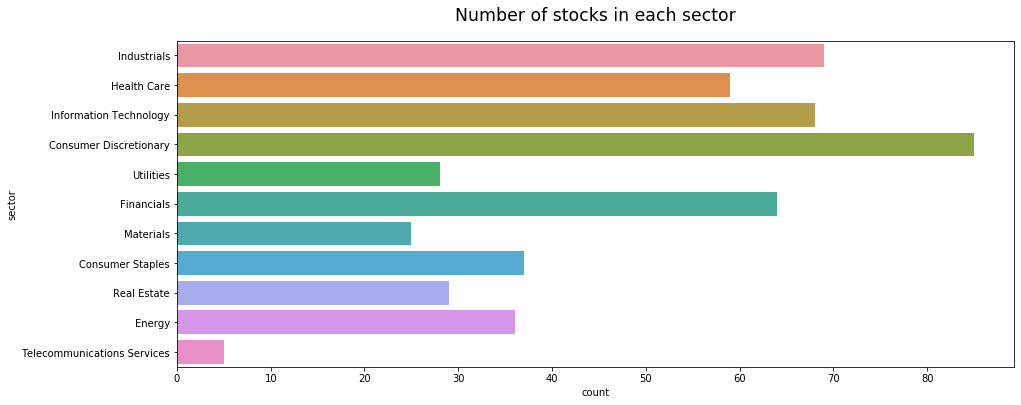

In [8]:
plt.figure(figsize=(15, 6))
ax = sns.countplot(y='sector', data=sec)
plt.title('Number of stocks in each sector',fontsize='xx-large',pad=20)
plt.xticks()

In [9]:
sec_sector=sec.groupby(by='sector').count()
sec_sector.reset_index(inplace=True)
sec_sector

,sector,symbol,Security,SEC filings,sub_sector,Address of Headquarters,Date first added,CIK
0,Consumer Discretionary,85,85,85,85,85,61,85
1,Consumer Staples,37,37,37,37,37,20,37
2,Energy,36,36,36,36,36,21,36
3,Financials,64,64,64,64,64,31,64
4,Health Care,59,59,59,59,59,37,59
5,Industrials,69,69,69,69,69,46,69
6,Information Technology,68,68,68,68,68,43,68
7,Materials,25,25,25,25,25,17,25
8,Real Estate,29,29,29,29,29,19,29
9,Telecommunications Services,5,5,5,5,5,3,5


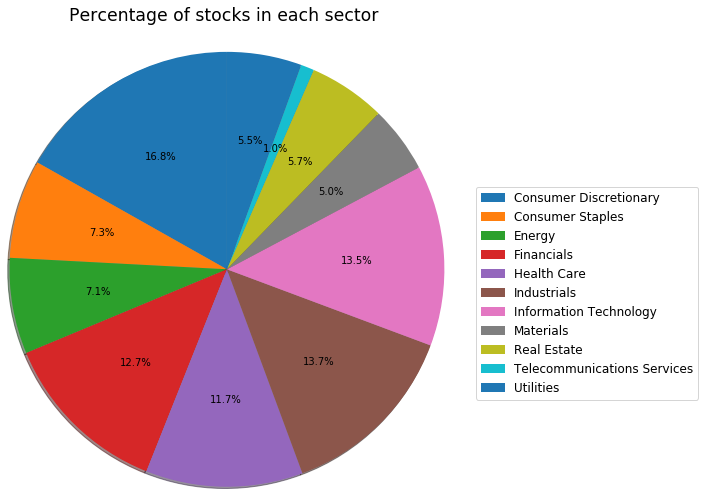

In [10]:
fig4, ax4 = plt.subplots()
labels=sec_sector.sector
ax4.pie(sec_sector.symbol, autopct='%1.1f%%',shadow=True, startangle=90,radius=2.5)
plt.title('Percentage of stocks in each sector ',pad=140,fontsize='xx-large')
plt.legend(labels=labels,bbox_to_anchor=(0.4, 0.8), bbox_transform=ax.transAxes,fontsize='large')
plt.show()

In [12]:
sector_pivot = pd.pivot_table(adj_price, values = 'close', index = ['date'],columns = ['sector']).reset_index()
sector_pivot.head()

sector,date,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Telecommunications Services,Utilities
0,2010-01-04,34.694286,34.465000,47.015758,36.701724,44.512963,39.989524,39.599206,45.853043,43.027586,25.714,34.464643
1,2010-01-05,34.996538,34.467353,47.482121,37.042931,44.320000,40.061270,39.554444,45.841304,43.141724,25.818,34.096071
2,2010-01-06,34.890641,34.500588,48.022121,37.024310,44.412963,40.169524,39.256190,46.334348,43.021724,24.926,34.258929
3,2010-01-07,35.137436,34.476765,47.864242,37.587586,44.636296,40.468095,38.953651,46.184783,43.232414,24.782,34.113571
4,2010-01-08,35.260897,34.329118,48.331212,37.566379,44.677963,40.962698,39.244921,46.406957,42.885517,24.560,34.077857


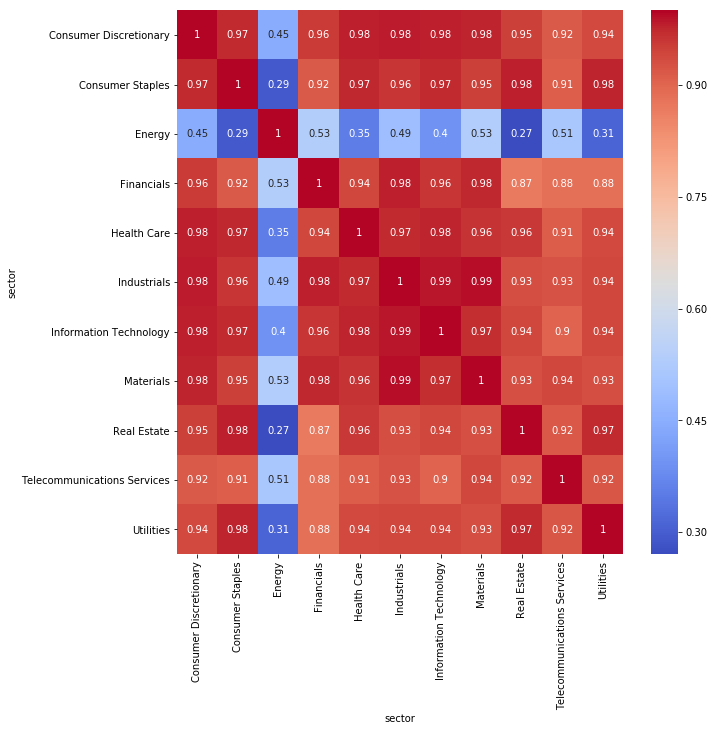

In [13]:
#### can be used to create a portfolio
plt.figure(figsize = (10,10))
sns.heatmap(sector_pivot.corr(),annot=True, cmap="coolwarm")

In [14]:
min_d=adj_price.groupby('symbol').min() ### gets start_date for each stock(date from when we have data of particular stock)
max_d=adj_price.groupby('symbol').max()  ### gets  end_date for each stock(date till when we have data of particular stock)
min_d = min_d.rename(columns = {'date' : 'start_date'})
max_d = max_d.rename(columns = {'date' : 'end_date'})

In [15]:
min_d=min_d.reset_index()
max_d=max_d.reset_index()

In [16]:
adj_price  = adj_price.merge(min_d[['symbol','start_date']], on = 'symbol') # adding start date of each stock
adj_price  = adj_price.merge(max_d[['symbol','end_date']], on = 'symbol') # adding end date of each stock

In [17]:
#[(adj_price.date==adj_price.start_date)]
initial_open=adj_price[['symbol','open','start_date','Security','sector','sub_sector']][(adj_price.date==adj_price.start_date)]
initial_open = initial_open.rename(columns = {'open' : 'initial_open'})
final_open=adj_price[['symbol','open','end_date']][(adj_price.date==adj_price.end_date)]
final_open = final_open.rename(columns = {'open' : 'final_open'})                                        
per_chg= initial_open.merge(final_open, on = 'symbol')
per_chg.insert(5, 'total_per_chg',((per_chg.final_open)-(per_chg.initial_open))/per_chg.initial_open*100)


In [18]:
best_10=per_chg.sort_values(by='total_per_chg' ,ascending=False).head(10)
worst_10=per_chg.sort_values(by='total_per_chg' ).head(10)
worst_10

,symbol,initial_open,start_date,Security,sector,total_per_chg,sub_sector,final_open,end_date
362,RIG,84.48,2010-01-04,Transocean,Energy,-82.516572,Oil & Gas Drilling,14.77,2016-12-30
394,SWN,49.69,2010-01-04,Southwestern Energy,Energy,-78.466492,Oil & Gas Exploration & Production,10.70,2016-12-30
180,FSLR,136.00,2010-01-04,First Solar Inc,Information Technology,-76.029412,Semiconductors,32.60,2016-12-30
83,CHK,25.95,2010-01-04,Chesapeake Energy,Energy,-72.447013,Integrated Oil & Gas,7.15,2016-12-30
165,FCX,41.31,2010-01-04,Freeport-McMoran Cp & Gld,Materials,-67.126604,Copper,13.58,2016-12-30
385,SPLS,24.62,2010-01-04,Staples Inc.,Consumer Discretionary,-62.672624,Specialty Stores,9.19,2016-12-30
182,FTR,7.89,2010-01-04,Frontier Communications,Telecommunications Services,-57.160963,Integrated Telecommunications Services,3.38,2016-12-30
291,MOS,60.45,2010-01-04,The Mosaic Company,Materials,-51.381307,Fertilizers & Agricultural Chemicals,29.39,2016-12-30
311,NRG,23.78,2010-01-04,NRG Energy,Utilities,-47.645080,Independent Power Producers & Energy Traders,12.45,2016-12-30
476,KMI,35.82,2013-01-02,Kinder Morgan,Energy,-42.183138,Oil & Gas Refining & Marketing & Transportation,20.71,2016-12-30


In [19]:
best_10_sector=best_10.groupby(by='sector').count()
worst_10_sector=worst_10.groupby(by='sector').count()
worst_10_sector.reset_index(inplace=True)
best_10_sector.reset_index(inplace=True)

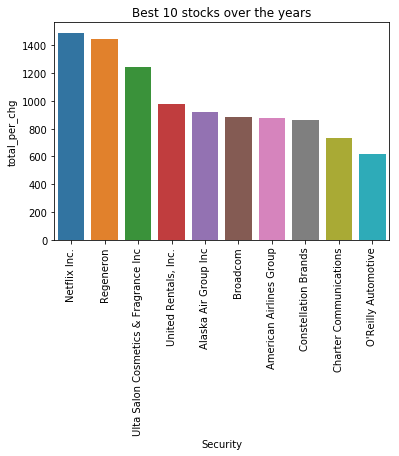

In [20]:
### BEST 10 STOCKS
g=sns.barplot(best_10.Security,best_10.total_per_chg)
g.set_xticklabels(labels=best_10.Security,rotation=90)
plt.title('Best 10 stocks over the years')
plt.show()

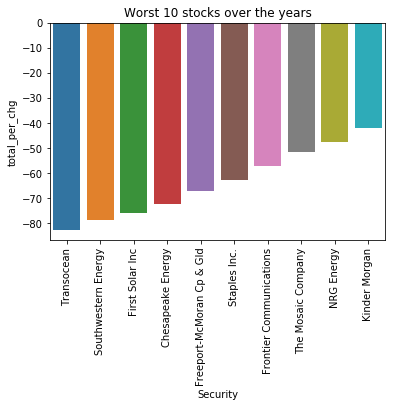

In [21]:
### WORST 10 STOCKS
m=sns.barplot(worst_10.Security,worst_10.total_per_chg)
m.set_xticklabels(labels=worst_10.Security,rotation=90)
plt.title('Worst 10 stocks over the years')
plt.show()

In [22]:
best_30=per_chg.sort_values(by='total_per_chg' ,ascending=False).head(30)
worst_30=per_chg.sort_values(by='total_per_chg' ).head(30)
best_30_sector=best_30.groupby(by='sector').count()
worst_30_sector=worst_30.groupby(by='sector').count()
worst_30_sector.reset_index(inplace=True)
best_30_sector.reset_index(inplace=True)

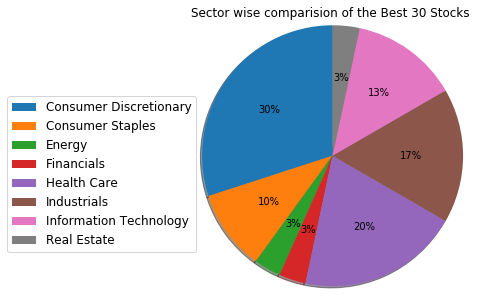

In [23]:
## Best 30 stocks sector wise percentage
fig2, ax2 = plt.subplots()
ax2.pie(best_30_sector.symbol,autopct='%1.0f%%',shadow=True, labeldistance=1,startangle=90,radius=1.5)
labels=best_30_sector.sector

plt.title('Sector wise comparision of the Best 30 Stocks ',pad=30,fontsize ='large')

plt.legend(labels=labels,loc='upper right', bbox_to_anchor=(-0.1,0.8),fontsize ='large')
#plt.pie(sizes, labels=labels, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.show()


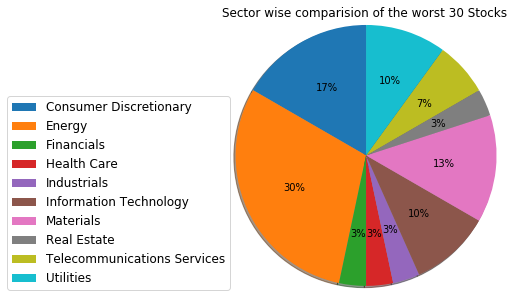

In [24]:
## Worst 30 stocks sector wise percentage
fig2, ax2 = plt.subplots()
ax2.pie(worst_30_sector.symbol,autopct='%1.0f%%',shadow=True, labeldistance=1,startangle=90,radius=1.5)
labels=worst_30_sector.sector

plt.title('Sector wise comparision of the worst 30 Stocks ',pad=30,fontsize ='large')

plt.legend(labels=labels,loc='upper right', bbox_to_anchor=(-0.1,0.8),fontsize ='large')
#plt.pie(sizes, labels=labels, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.show()

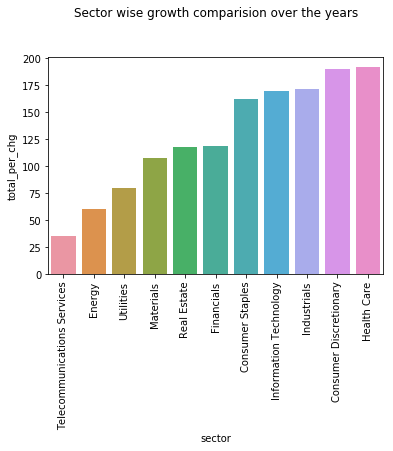

In [25]:
## Sector wise growth
sector_per_chg=per_chg.groupby(by='sector').mean().sort_values(by='total_per_chg')
sector_per_chg.reset_index(inplace=True)
g=sns.barplot(sector_per_chg.sector,sector_per_chg.total_per_chg)
g.set_xticklabels(labels=sector_per_chg.sector,rotation=90)
plt.title('Sector wise growth comparision over the years',pad=40)
plt.show()

In [26]:
adj_price.sort_values(by='per_chg',ascending=False).head(10) #top 10 stocks with highest +ve % change in a single day
adj_price.sort_values(by='per_chg').head(10) #top 10 stocks with highest -ve % change in a single day
#adj_price[(adj_price.symbol=='FSLR')&(adj_price.date=='2013-04-09')]


,date,year,month,day,symbol,open,close,change,per_chg,low,high,volume,sector,sub_sector,Security,start_date,end_date
316106,2011-10-25,2011,10,25,FSLR,58.11,43.27,negative,-25.54,42.50,58.61,23572600.0,Information Technology,Semiconductors,First Solar Inc,2010-01-04,2016-12-30
792923,2016-02-08,2016,2,8,WMB,14.93,11.16,negative,-25.25,10.22,15.00,62368000.0,Energy,Oil & Gas Exploration & Production,Williams Cos.,2010-01-04,2016-12-30
834740,2015-05-27,2015,5,27,KORS,60.59,45.93,negative,-24.20,45.88,60.59,69237400.0,Consumer Discretionary,"Apparel, Accessories & Luxury Goods",Michael Kors Holdings,2013-01-02,2016-12-30
146269,2016-02-08,2016,2,8,CHK,2.56,2.04,negative,-20.31,1.50,2.59,121984600.0,Energy,Integrated Oil & Gas,Chesapeake Energy,2010-01-04,2016-12-30
290734,2016-01-11,2016,1,11,FCX,5.40,4.31,negative,-20.19,4.23,5.42,117668200.0,Materials,Copper,Freeport-McMoran Cp & Gld,2010-01-04,2016-12-30
259062,2016-03-15,2016,3,15,ENDP,40.72,32.57,negative,-20.01,32.48,40.98,17422000.0,Health Care,Pharmaceuticals,Endo International,2010-01-04,2016-12-30
259225,2016-11-03,2016,11,3,ENDP,18.24,14.63,negative,-19.79,14.39,18.51,20578100.0,Health Care,Pharmaceuticals,Endo International,2010-01-04,2016-12-30
538370,2012-10-24,2012,10,24,NFX,33.86,27.46,negative,-18.90,26.97,34.14,21434200.0,Energy,Oil & Gas Exploration & Production,Newfield Exploration Co,2010-01-04,2016-12-30
438759,2016-02-04,2016,2,4,KSS,51.13,41.52,negative,-18.80,40.95,51.13,22573600.0,Consumer Discretionary,General Merchandise Stores,Kohl's Corp.,2010-01-04,2016-12-30
618408,2015-10-16,2015,10,16,PWR,23.06,18.74,negative,-18.73,18.51,23.06,24408600.0,Industrials,Industrial Conglomerates,Quanta Services Inc.,2010-01-04,2016-12-30


# Model Building

# Extract data from the merged dataset

In [9]:
# Taking best 20 stocks over the years 
best_stocks = per_chg.sort_values(by='total_per_chg' ,ascending=False).symbol
target_columns = ['change', 'close']
target = target_columns[0]
stock_data = adj_price[adj_price.symbol.isin(best_stocks[:20])]
stock_data = stock_data[['month','day', 'symbol', 'open','close','change', 'low','high','volume']]
stock_data.head()

NameError: name 'per_chg' is not defined

# Get the features and target

In [ ]:
X = stock_data.drop(columns=[target, 'close'])
y = stock_data[target]
feature_value_names = X.columns

## Encoding the Categorical Target

In [ ]:
import pandas as pd
X = pd.get_dummies(X, columns=['symbol'])
X.head(10)
feature_value_names = X.columns

# Missing values check

In [ ]:
# Check NA
pd.set_option('display.max_rows', None)
stock_data.isna().sum()

# Remove missing values

In [ ]:
print('Number of rows before removing rows with missing values:', str(X.shape[0]))
# Remove rows with np.NaN
X = X.dropna(how='any')
print('Number of rows after removing rows with missing values:', str(X.shape[0]))

# Encode the categorical target

In [ ]:
y.value_counts()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

pd.DataFrame(data=y, columns=[target])[target].value_counts()

# Over sampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# RandomOverSampler (with random_state=0)
ros = RandomOverSampler(random_state=0)
X, y = ros.fit_sample(X, y)

pd.DataFrame(data=y, columns=[target])[target].value_counts()

# Divide the data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Divide the data into training and testing (using the above test_size and random_state)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

<b>
<p>
<center>
<font size="5">
Classification Models
</font>
</center>
</p>
</b>

# Logistic Regression

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

class MyLogisticRegression(BaseEstimator, ClassifierMixin):
    """My logistic regression model (implemented using numpy array)"""
    
    def __init__(self, n_iter=100, eta=10 ** -2, C=1, random_state=0):
        # The number of iterations
        self.n_iter = n_iter
        
        # The learning rate
        self.eta = eta
        
        # The regularization parameter
        self.C = C
        
        # The random state
        self.random_state = random_state
        
        # The class labels
        self.classes = None
        
        # The cost
        self.cost = None
        
        # The parameters
        self.w = None
        
    def fit(self, X, y):
        """
        The fit function
        
        Parameters
        ----------
        X : the feature matrix
        y : the target vector
        """
        
        # Get the class labels
        self.classes = np.unique(y)
        
        # Get the one-hot-encoded target matrix
        # Here y_one_hot_encode is a X.shape[0] by len(self.classes) matrix
        y_one_hot_encode = pd.get_dummies(y).values
                
        # Initialize the cost
        self.cost = []
        
        # The random number generator
        self.rgen = np.random.RandomState(seed=self.random_state)
        
        # Initialize the weight for features x0 (the dummy feature), x1, x2, ..., xn (with respect to each class)
        # Here self.w is a X.shape[1] + 1 by len(self.classes) matrix
        self.w = self.rgen.normal(loc=0.0, scale=0.01, size=(X.shape[1] + 1, len(self.classes)))

        # For each iteration
        for _ in range(self.n_iter):
            # Get the net input
            # Here net_input is a X.shape[0] by len(self.classes) matrix
            net_input = self.net_input(X)
            
            # Get the sigmoid
            # Here sigmoid is a X.shape[0] by len(self.classes) matrix
            sigmoid = self.sigmoid(net_input)
            
            # Get the errors
            # Here errors is a X.shape[0] by len(self.classes) matrix     
            errors = y_one_hot_encode - sigmoid
            
            # Get the mean squared error (mse)
            mse = (errors ** 2).sum()
            
            # Update the cost
            self.cost.append(mse)
            
            # Update the weight of features x1, x2, ..., xn (with respect to each class)
            self.w[1:,] += self.eta * (np.matmul(X.T, errors) - 2 * self.C * self.w[1:,])
            
            # Update the weight of the dummy feature, x0 (with respect to each class)
            self.w[0, :] += self.eta * errors.sum(axis=0)

    def net_input(self, X):
        """
        Get the net input
        
        Parameters
        ----------
        X : the feature matrix
        
        Returns
        ----------
        The net input
       
        """
        
        return np.matmul(X, self.w[1:,]) + self.w[0, :]
    
    def sigmoid(self, net_input):
        """
        Get the sigmoid
        
        Parameters
        ----------
        net_input : the net input
        
        Returns
        ----------
        The sigmoid
       
        """
        
        return 1 / (1 + (np.exp(np.clip(-net_input, -250, 250))))

    def predict(self, X):
        """
        The predict function
        
        Parameters
        ----------
        X : the feature matrix
        
        Returns
        ----------
        The class with the maximum probability
        """
        
        # Get the net input
        net_input = self.net_input(X)
        
        # Get the sigmoid
        sigmoid = self.sigmoid(net_input)
    
        # Return the class with the maximum probability
        return np.argmax(sigmoid, axis=1)

# Hypterparameter tuning and model selection

In [ ]:
from sklearn.linear_model import LogisticRegression

clfs = {'lr': LogisticRegression(random_state=0),
        'mylr': MyLogisticRegression(random_state=0)}

## Create the dictionary of pipeline
- In the dictionary:
    - the key is the acronym of the classifier
    - the value is the pipeline, with StandardScaler and the classifier

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe_clfs = {}

# Implement me
for name, clf in clfs.items():
    pipe_clfs[name] = Pipeline([('StandardScaler', StandardScaler()), 
                                ('clf', clf)])

## Create the dictionary of parameter grids
- In the dictionary:
    - the key is the acronym of the classifier
    - the value is the parameter grid of the classifier

In [ ]:
param_grids = {}

### The parameter grid for sklearn logistic regression
- The hyperparameters we want to tune are:
    - multi_class
    - solver
    - C

- Here we need to use two dictionaries in the parameter grid since 'multinomial' (multi_class) does not support 'liblinear' (solver).

In [ ]:
C_range = [10 ** i for i in range(-4, 5)]

param_grid = [{'clf__multi_class': ['ovr'], 
               'clf__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
               'clf__C': C_range},
              {'clf__multi_class': ['multinomial'],
               'clf__solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
               'clf__C': C_range}]

param_grids['lr'] = param_grid

### The parameter grid for MyLogisticRegression
- The hyperparameters we want to tune are:
    - eta
    - C

- See details of the meaning of the hyperparametes in the definition of MyLogisticRegression

In [ ]:
eta_range = [10 ** i for i in range(-3, 1)]
C_range = [10 ** i for i in range(-4, 5)]

param_grid = [{'clf__eta': eta_range,
               'clf__C': C_range}]

param_grids['mylr'] = param_grid

## Hyperparameter tuning
- Here we use two functions for hyperparameter tuning:
    - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html): Exhaustive search over specified parameter values for an estimator
    - [StratifiedKFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html): Stratified K-Folds cross-validator

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# The list of [best_score_, best_params_, best_estimator_]
best_score_param_estimators = []

# For each classifier
for name in pipe_clfs.keys():
    # GridSearchCV
    gs = GridSearchCV(estimator=pipe_clfs[name],
                      param_grid=param_grids[name],
                      scoring='accuracy',
                      n_jobs=-1,
                      iid=False,
                      cv=StratifiedKFold(n_splits=10,
                                         random_state=0),
                      return_train_score=True)
    # Fit the pipeline
    gs = gs.fit(X_train, y_train)
    
    # Update best_score_param_estimators
    best_score_param_estimators.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
    # Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
    cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
    # Get the important columns in cv_results
    important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
    # Move the important columns ahead
    cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

    # Write cv_results file
    cv_results.to_csv(path_or_buf=name + '_cv_results.csv', index=False)

## Model selection

In [ ]:
# Sort best_score_param_estimators in descending order of the best_score_
best_score_param_estimators = sorted(best_score_param_estimators, key=lambda x : x[0], reverse=True)

# Print best_score_param_estimators
for rank in range(len(best_score_param_estimators)):
    best_score, best_params, best_estimator = best_score_param_estimators[rank]

    print('Top', str(rank + 1))    
    print('%-15s' % 'best_score:', best_score)
    print('%-15s' % 'best_estimator:'.format(20), type(best_estimator.named_steps['clf']))
    print('%-15s' % 'best_params:'.format(20), best_params, end='\n\n')

# Prediction

In [ ]:
# Predict the target value using the best estimator
# Hint: you should use the above best_estimator
y_pred = best_score_param_estimators[0][2].predict(X_test)
y_pred

# Accuracy and Confusion matrix

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
acc = accuracy_score(y_test, y_pred) * 100
print(acc)
conf_matrix = confusion_matrix(y_test, y_pred)
class_names = np.unique(y_test)
df_cm = pd.DataFrame(conf_matrix, index=class_names, columns=class_names )
print(df_cm)

# Logistic Regression Results
The results above show that, the average accuracy of the model which we implemented is lower than that of the sklearn model. This means that, on the stocks dataset, sklearn model is more accurate and more robust than our model.

# Decision Tree

# Train the decision tree

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

# Create the pipeline with StandardScaler and DecisionTreeClassifier
pipe_dt = Pipeline([('StandardScaler', StandardScaler()), 
                    ('DecisionTreeClassifier', DecisionTreeClassifier(max_depth=4))])

pipe_dt.fit(X_train, y_train)
# Get the list of accuracy obtained by cross_val_score (using KFold, and tha above n_splits and random_state)
dt_score = cross_val_score(pipe_dt, X_train, y_train, cv=KFold(n_splits=10, random_state=123))
# Get the average accuracy of each model obtained by cross validation
dt_score.mean()

# Prediction

In [ ]:
y_pred = pipe_dt.predict(X_test)

# Accuracy and Confusion matrix

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
acc = accuracy_score(y_test, y_pred) * 100
print(acc)
conf_matrix = confusion_matrix(y_test, y_pred)
class_names = np.unique(y_test)
df_cm = pd.DataFrame(conf_matrix, index=class_names, columns=class_names )
df_cm

# Plot Decision Tree

In [ ]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image

dot_data = export_graphviz(pipe_dt.named_steps['DecisionTreeClassifier'],
                           filled=True, 
                           rounded=True,
                           class_names=['F', 
                                        'T'],
                           feature_names=feature_value_names,
                           out_file=None) 

graph = graph_from_dot_data(dot_data) 

Image(graph.create_png())

# Decision Tree results
From the confusion matrix, we can see that the number of wrong classifications are more and accuracy on the train data is 50.87% which is pretty low.

# Random Forest

# Train the random forest

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Create the pipeline with StandardScaler and RandomForestClassifier
pipe_rf = Pipeline([('StandardScaler', StandardScaler()), 
                    ('RandomForestClassifier', RandomForestClassifier())])

pipe_rf.fit(X_train, y_train)
# Get the list of accuracy obtained by cross_val_score (using KFold, and tha above n_splits and random_state)
rf_score = cross_val_score(pipe_rf, X_train, y_train, cv=KFold(n_splits=10, random_state=123))
# Get the average accuracy of each model obtained by cross validation
rf_score.mean()

# Prediction

In [ ]:
y_pred = pipe_rf.predict(X_test)

# Accuracy and Confusion matrix

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
acc = accuracy_score(y_test, y_pred) * 100
print(acc)
conf_matrix = confusion_matrix(y_test, y_pred)
class_names = np.unique(y_test)
df_cm = pd.DataFrame(conf_matrix, index=class_names, columns=class_names )
df_cm

In [ ]:
import matplotlib.pyplot as plt

# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(pipe_rf.named_steps['RandomForestClassifier'].feature_importances_, feature_value_names)

# Sort the array in descending order of the importances
f_importances = f_importances.sort_values(ascending=False)

# Draw the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=9)

# Show the plot
plt.tight_layout()
plt.show()

# Random Forest results:
Using random forest model, we got an accuracy of 55.16% on the training data which is not that great.

# Hyperparameter tuning and model selection
In this section
- we first use the combination of Pipeline and GridSearchCV to fine tune the hyperparameters of classifiers

## Create the dictionary of classifiers
- In the dictionary:
    - the key is the acronym of the classifier
    - the value is the classifier

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

clfs = {'mlp': MLPClassifier(random_state=0),
        'dt': DecisionTreeClassifier(random_state=0),
        'rf': RandomForestClassifier(random_state=0),
        'xgb': XGBClassifier(seed=0),
        'knn': KNeighborsClassifier()}

## Create the dictionary of pipeline
In the dictionary:
- the key is the acronym of the classifier
- the value is the pipeline (with StandardScaler and the classifier)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe_clfs = {}

for name, clf in clfs.items():
    # Implement me
    pipe_clfs[name] = Pipeline([('StandardScaler', StandardScaler()), 
                                ('clf', clf)])

## Create the dictionary of parameter grids
In the dictionary:
- the key is the acronym of the classifier
- the value is the parameter grid of the classifier

In [ ]:
param_grids = {}

### The parameter grid for MLP
The hyperparameters we want to fine tune are:
- hidden_layer_sizes
- activation

See details of the meaning of the hyperparametes in [sklearn multi-layer perceptron documentation](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)

In [ ]:
param_grid = [{'clf__hidden_layer_sizes': [10, 100],
               'clf__activation': ['identity', 'logistic', 'tanh', 'relu']}]

param_grids['mlp'] = param_grid

### The parameter grid for decision tree
The hyperparameters we want to fine tune are:
- min_samples_split
- min_samples_leaf

See details of the meaning of the hyperparametes in [sklearn decision tree documentation](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

In [ ]:
param_grid = [{'clf__min_samples_split': [2, 10, 30],
               'clf__min_samples_leaf': [1, 10, 30]}]

param_grids['dt'] = param_grid

### The parameter grid for random forest
The hyperparameters we want to fine tune are:
- n_estimators
- min_samples_split
- min_samples_leaf

See details of the meaning of the hyperparametes in [sklearn random forest documentation](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [ ]:
param_grid = [{'clf__n_estimators': [10, 100],
               'clf__min_samples_split': [2, 10, 30],
               'clf__min_samples_leaf': [1, 10, 30]}]

param_grids['rf'] = param_grid

### The parameter grid for xgboost
The hyperparameters we want to fine tune are:
- eta
- gamma
- lambda

See details of the meaning of the hyperparametes in [XGBoost documentation](https://xgboost.readthedocs.io/en/latest/parameter.html)

In [ ]:
param_grid = [{'clf__eta': [10 ** i for i in range(-4, 1)],
               'clf__gamma': [0, 10, 100],
               'clf__lambda': [10 ** i for i in range(-4, 5)]}]

param_grids['xgb'] = param_grid

### The parameter grid for KNN
The hyperparameters we want to fine tune are:
- n_neighbors

See details of the meaning of the hyperparametes in [sklearn KNN documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [ ]:
param_grid = [{'clf__n_neighbors': list(range(1, 11))}]

param_grids['knn'] = param_grid

## Hyperparameter tuning
Here we use two functions for hyperparameter tuning:
- [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html): Exhaustive search over specified parameter values for an estimator
- [StratifiedKFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html): Stratified K-Folds cross-validator

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# The list of [best_score_, best_params_, best_estimator_]
best_score_param_estimators = []

# For each classifier
for name in pipe_clfs.keys():
    # GridSearchCV
    # Implement me
    gs = GridSearchCV(estimator=pipe_clfs[name],
                      param_grid=param_grids[name],
                      scoring='accuracy',
                      n_jobs=1,
                      iid=False,
                      cv=StratifiedKFold(n_splits=10,
                                         shuffle=True,
                                         random_state=0))
    # Fit the pipeline
    # Implement me
    gs = gs.fit(X_train, y_train)
    
    # Update best_score_param_estimators
    best_score_param_estimators.append([gs.best_score_, gs.best_params_, gs.best_estimator_])

## Model selection

In [ ]:
# Sort best_score_param_estimators in descending order of the best_score_
# Implement me
best_score_param_estimators = sorted(best_score_param_estimators, key=lambda x : x[0], reverse=True)

# For each [best_score_, best_params_, best_estimator_]
for best_score_param_estimator in best_score_param_estimators:
    # Print out [best_score_, best_params_, best_estimator_], where best_estimator_ is a pipeline
    # Since we only print out the type of classifier of the pipeline
    print([best_score_param_estimator[0], best_score_param_estimator[1], type(best_score_param_estimator[2].named_steps['clf'])], end='\n\n')

# Conclusion

## Finals Results of Classification Models

The results of classification models show that, Logistic Regression has the highest accuracy of 84.16%, followed by decision tree, random forest, xgboost, MLP and KNN. Also, predicting on Test data using Logistic Regression model with best parameters gave us an accuracy of 84.15%.